# Data Preprocessing Notebook
- This notebook contains essential preprocessing steps to prepare a dataset for ML models.

## 1. Loading Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

# settings for Better Data Display in Jupyter Notebook

pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_colwidth', None)     # Show full column content (even long text)
pd.set_option('display.expand_frame_repr', False)  # Prevent line-wrapping of DataFrames

# Enable seaborn style
sns.set_style("whitegrid")

## 2. Loading Data

In [2]:
# Load the dataset 
RAW_CSV_PATH = 'D:/FYP/webapp/IDS/media/csvs/attack_traffic_01.csv'  # Remember to update file name and use / instead of \ in the path
#df = pd.read_csv(RAW_CSV_PATH, low_memory=False)   # Use this line if  having memory issues just to ignore erorrs


## 3. Understanding Data

In [7]:
df = pd.read_csv(RAW_CSV_PATH)
print(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")# Display basic info
df.info()

✅ Dataset loaded: 80105 rows, 1 columns
<class 'pandas.core.frame.DataFrame'>
Index: 80105 entries, 1|Mar 17 to 80105|Mar 17
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                                         --------------  ----- 
 0   frame.number|frame.time|wlan_radio.signal_db|wlan_radio.channel|wlan.ssid|_ws.col.protocol|ip.ttl|ip.src|ip.dst|tcp.srcport|tcp.dstport|frame.len|frame.time_delta_displayed|_ws.col.Protocol  80105 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [4]:
df.head()

,frame.number|frame.time|wlan_radio.signal_db|wlan_radio.channel|wlan.ssid|_ws.col.protocol|ip.ttl|ip.src|ip.dst|tcp.srcport|tcp.dstport|frame.len|frame.time_delta_displayed|_ws.col.Protocol
1|Mar 17,2025 15:24:08.655020000 Pakistan Standard Time||||DHCP|64.0|192.168.100.11|192.168.100.1|||330|0.0|
2|Mar 17,2025 15:24:08.655033000 Pakistan Standard Time||||DHCP|64.0|192.168.100.11|192.168.100.1|||330|1.3e-05|
3|Mar 17,2025 15:24:08.968059000 Pakistan Standard Time||||DNS||||||118|0.313026|
4|Mar 17,2025 15:24:08.968071000 Pakistan Standard Time||||DNS||||||118|1.2e-05|
5|Mar 17,2025 15:24:08.968389000 Pakistan Standard Time||||DNS||||||117|0.000318|


In [5]:
df.columns

Index(['frame.number|frame.time|wlan_radio.signal_db|wlan_radio.channel|wlan.ssid|_ws.col.protocol|ip.ttl|ip.src|ip.dst|tcp.srcport|tcp.dstport|frame.len|frame.time_delta_displayed|_ws.col.Protocol'], dtype='object')

In [8]:

#df[['ip.dst', '_ws.col.info']]

df['ip.src'].unique()


array(['192.168.100.11', nan, '192.168.100.75', '192.168.100.27',
       '13.107.3.254', '192.168.100.11,192.168.100.27', '192.168.100.1',
       '192.168.100.11,192.168.100.1', '20.24.40.162', '192.168.100.60',
       '204.79.197.222', '192.168.100.139', '162.159.200.1',
       '13.107.13.93', '10.10.10.3', '51.104.15.253', '20.42.73.31',
       '20.207.73.85', '13.67.9.5', '192.168.100.78', '140.82.114.22',
       '192.168.100.48', '20.50.88.242', '192.168.100.49', '40.79.189.59',
       '140.82.112.21', '104.208.16.90', '20.207.93.38',
       '109.126.139.236', '136.93.238.194', '15.46.231.146',
       '183.22.149.75', '8.14.235.100', '166.155.0.133', '95.132.230.121',
       '157.230.79.193', '187.47.9.50', '39.124.76.92', '20.189.173.1',
       '20.50.88.234', '140.82.113.21', '13.78.111.199', '140.82.114.21',
       '13.107.5.93', '20.189.172.33', '104.17.143.163', '20.189.173.24',
       '131.253.33.203', '20.42.65.94', '208.84.6.254', '20.207.73.82',
       '92.123.159.240', '3

In [ ]:
#will use these for attack label encoding
# 192.168.100.11', '192.168.100.75','192.168.100.1', '192.168.100.60','192.168.100.139', '192.168.100.78', 
# '192.168.100.48', '192.168.100.49', '192.168.100.11,'192.168.100.75',
       

## 4.Remove Duplicates

In [9]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)
print(f"✅ After removing duplicates: {df.shape}")

✅ After removing duplicates: (80105, 23)


## 5. Handling Missing Values

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])


Missing Values per Column:
wlan_radio.signal_db    80105
wlan_radio.channel      80105
wlan.ssid               80105
ip.ttl                  17166
wlan.bssid              80105
wlan.sa                 80105
wlan.ta                 80105
wlan.ra                 80105
wlan.da                 80105
ip.src                  17166
ip.dst                  17166
tcp.srcport              9116
tcp.dstport              9116
tcp.flags                9132
_ws.col.info              246
ppi_gps.lat             80105
ppi_gps.lon             80105
dtype: int64


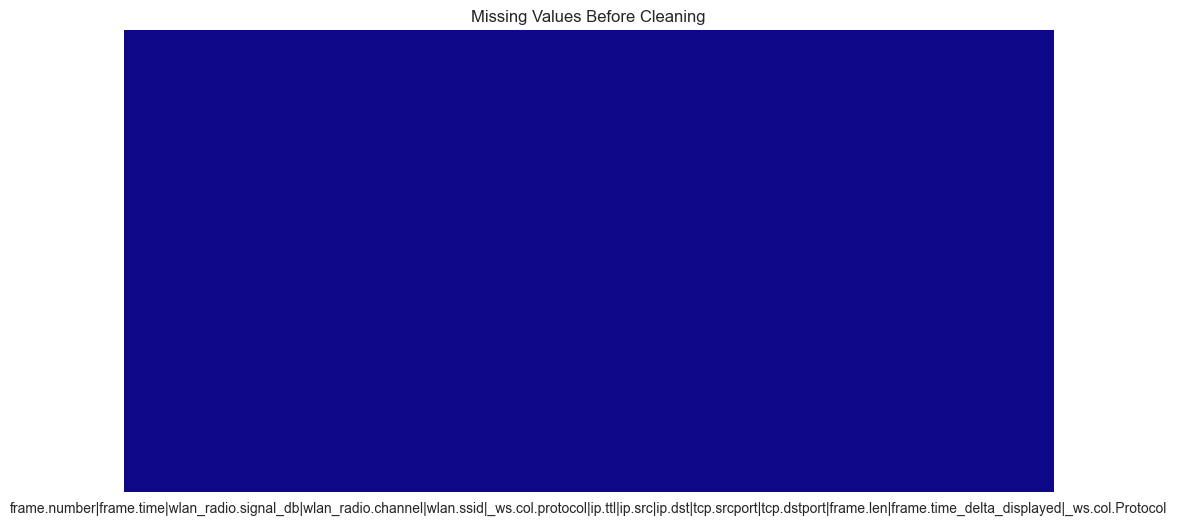

In [6]:
# Visualizing Missing Values Before Cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="plasma", cbar=False, yticklabels=False)
plt.title("Missing Values Before Cleaning")
plt.show()
#yellow missing values, blue no missing values

In [14]:
df = df.dropna(axis=1, how="all")  # Drop fully empty columns
df = df.dropna(axis=0, how="all")  # Drop fully empty rows
df = df.dropna(thresh=0.5 * len(df), axis=1)  # Drop columns with >50% missing values
#verify
df.shape
#view
df.head()

,frame.number,frame.time,_ws.col.protocol,ip.ttl,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,_ws.col.info,frame.len,frame.time_delta_displayed,ppi_gps.alt\r
0,1,"Mar 17, 2025 15:24:08.655020000 Pakistan Standard Time",DHCP,64,192.168.100.11,192.168.100.1,NaN,NaN,NaN,DHCP Request - Transaction ID 0x69789b5b,330,0.000000,\r
1,2,"Mar 17, 2025 15:24:08.655033000 Pakistan Standard Time",DHCP,64,192.168.100.11,192.168.100.1,NaN,NaN,NaN,DHCP Request - Transaction ID 0x69789b5b,330,0.000013,\r
2,3,"Mar 17, 2025 15:24:08.968059000 Pakistan Standard Time",DNS,NaN,NaN,NaN,NaN,NaN,NaN,Standard query 0x7ad4 PTR 11.100.168.192.in-addr.arpa OPT,118,0.313026,\r
3,4,"Mar 17, 2025 15:24:08.968071000 Pakistan Standard Time",DNS,NaN,NaN,NaN,NaN,NaN,NaN,Standard query 0x7ad4 PTR 11.100.168.192.in-addr.arpa OPT,118,0.000012,\r
4,5,"Mar 17, 2025 15:24:08.968389000 Pakistan Standard Time",DNS,NaN,NaN,NaN,NaN,NaN,NaN,Standard query 0x1ed9 PTR 1.100.168.192.in-addr.arpa OPT,117,0.000318,\r


) missing from font(s) Arial.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) Arial.s\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


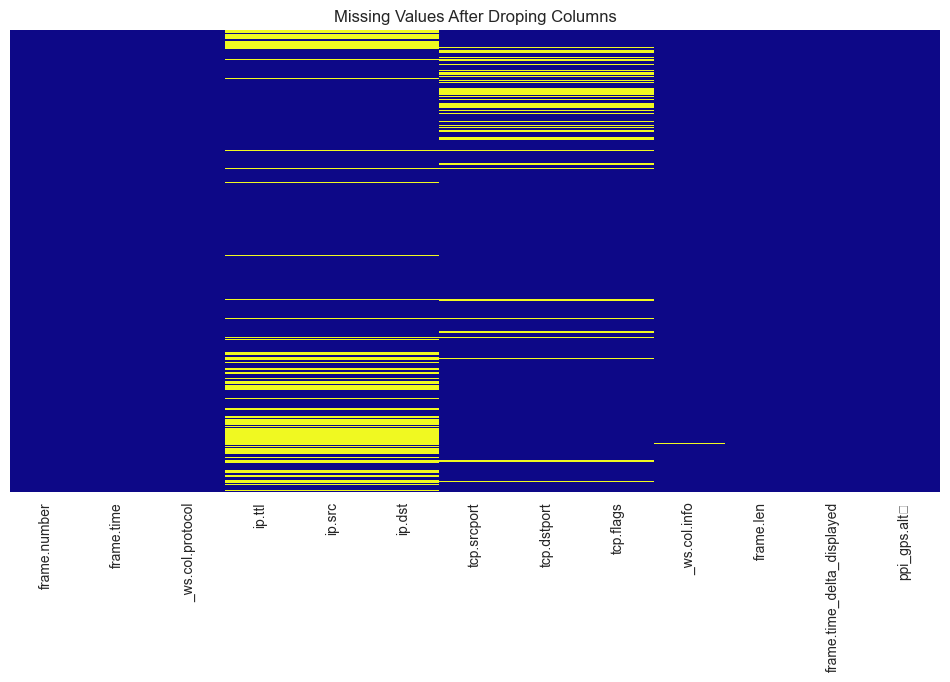

In [15]:
# Visualizing Missing Values after droping columns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="plasma", cbar=False, yticklabels=False)
plt.title("Missing Values After Droping Columns")
plt.show()

In [16]:
# To check if any colum dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80105 entries, 0 to 80104
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.number                80105 non-null  int64  
 1   frame.time                  80105 non-null  object 
 2   _ws.col.protocol            80105 non-null  object 
 3   ip.ttl                      62939 non-null  object 
 4   ip.src                      62939 non-null  object 
 5   ip.dst                      62939 non-null  object 
 6   tcp.srcport                 70989 non-null  float64
 7   tcp.dstport                 70989 non-null  float64
 8   tcp.flags                   70973 non-null  object 
 9   _ws.col.info                79859 non-null  object 
 10  frame.len                   80105 non-null  int64  
 11  frame.time_delta_displayed  80105 non-null  float64
                80105 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage:

In [171]:
df.drop(columns=['ppi_gps.alt\r'], inplace=True) #thiscolumn did not contain any useful information
print("✅ Column 'ppi_gps.alt\\r' dropped successfully.")


✅ Column 'ppi_gps.alt\r' dropped successfully.


In [172]:
# Fill missing values for **numerical** columns with median
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing values for **categorical** columns with mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))
df.head()

,frame.number,frame.time,_ws.col.protocol,ip.ttl,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,_ws.col.info,frame.len,frame.time_delta_displayed
0,1,"Mar 17, 2025 15:24:08.655020000 Pakistan Standard Time",DHCP,64,192.168.100.11,192.168.100.1,52813.0,443.0,0x0010,DHCP Request - Transaction ID 0x69789b5b,330,0.000000
1,2,"Mar 17, 2025 15:24:08.655033000 Pakistan Standard Time",DHCP,64,192.168.100.11,192.168.100.1,52813.0,443.0,0x0010,DHCP Request - Transaction ID 0x69789b5b,330,0.000013
2,3,"Mar 17, 2025 15:24:08.968059000 Pakistan Standard Time",DNS,128,192.168.100.27,192.168.100.27,52813.0,443.0,0x0010,Standard query 0x7ad4 PTR 11.100.168.192.in-addr.arpa OPT,118,0.313026
3,4,"Mar 17, 2025 15:24:08.968071000 Pakistan Standard Time",DNS,128,192.168.100.27,192.168.100.27,52813.0,443.0,0x0010,Standard query 0x7ad4 PTR 11.100.168.192.in-addr.arpa OPT,118,0.000012
4,5,"Mar 17, 2025 15:24:08.968389000 Pakistan Standard Time",DNS,128,192.168.100.27,192.168.100.27,52813.0,443.0,0x0010,Standard query 0x1ed9 PTR 1.100.168.192.in-addr.arpa OPT,117,0.000318


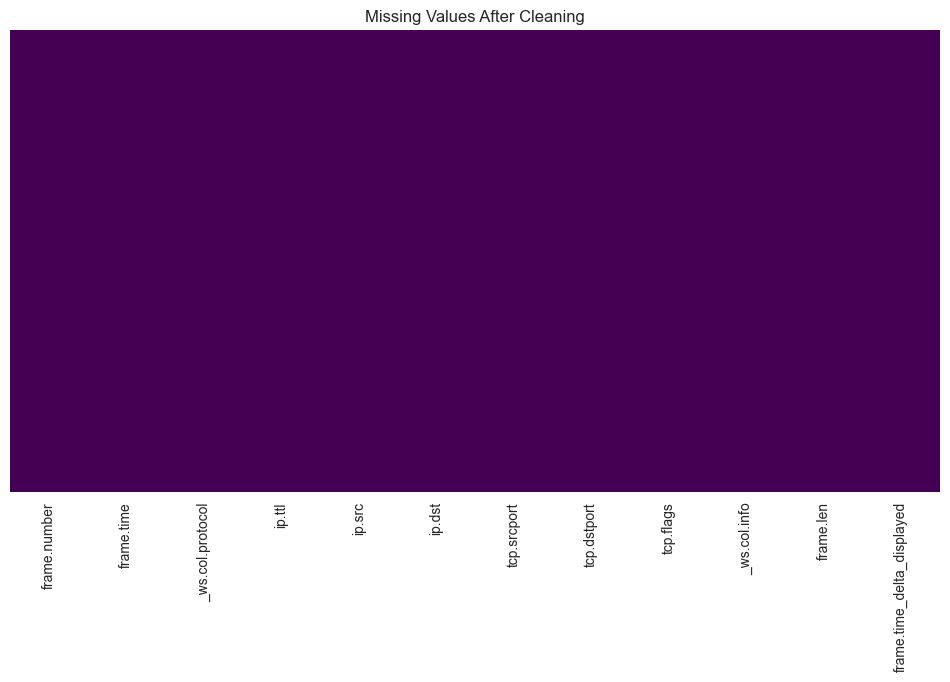

In [173]:
# Visualizing Missing Values After Cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values After Cleaning")
plt.show()

## 6. change time frame

In [174]:
df.drop(columns=['frame.time'], inplace=True) #thiscolumn is not necessary for ML models
print("✅ Column 'frame.time' dropped successfully.")


✅ Column 'frame.time' dropped successfully.


In [ ]:
# #To deal with column of time named 'frame.time'  (not using as droped the coulumn)
# # Convert 'frame.time' to datetime
# # Clean 'frame.time': remove timezone label and extra whitespace/characters
# df['frame.time'] = df['frame.time'].astype(str)
# df['frame.time'] = df['frame.time'].str.replace('Pakistan Standard Time', '', regex=False)
# df['frame.time'] = df['frame.time'].str.replace(r'[\r\n]', '', regex=True).str.strip()

# # Now safely parse datetime
# df['frame.time'] = pd.to_datetime(df['frame.time'], errors='coerce', format="%b %d, %Y %H:%M:%S.%f")

# # Sort chronologically
# df = df.sort_values(by='frame.time')

# print("✅ frame.time cleaned, timezone removed, converted to datetime, and dataset sorted.")


In [175]:
#To view changes
df.head()

,frame.number,_ws.col.protocol,ip.ttl,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,_ws.col.info,frame.len,frame.time_delta_displayed
0,1,DHCP,64,192.168.100.11,192.168.100.1,52813.0,443.0,0x0010,DHCP Request - Transaction ID 0x69789b5b,330,0.000000
1,2,DHCP,64,192.168.100.11,192.168.100.1,52813.0,443.0,0x0010,DHCP Request - Transaction ID 0x69789b5b,330,0.000013
2,3,DNS,128,192.168.100.27,192.168.100.27,52813.0,443.0,0x0010,Standard query 0x7ad4 PTR 11.100.168.192.in-addr.arpa OPT,118,0.313026
3,4,DNS,128,192.168.100.27,192.168.100.27,52813.0,443.0,0x0010,Standard query 0x7ad4 PTR 11.100.168.192.in-addr.arpa OPT,118,0.000012
4,5,DNS,128,192.168.100.27,192.168.100.27,52813.0,443.0,0x0010,Standard query 0x1ed9 PTR 1.100.168.192.in-addr.arpa OPT,117,0.000318


## 7. Labeling Data

In [ ]:
#will use these for label encoding
# 192.168.100.11', '192.168.100.75','192.168.100.1', '192.168.100.60','192.168.100.139', '192.168.100.78', 
# '192.168.100.48', '192.168.100.49', '192.168.100.11,'192.168.100.75',
       

In [176]:
# IP-Based Labeling for Attacks

#  Initialize all labels to 'normal'
df['label'] = 'normal'

# Define suspicious IPs (either source or destination)
suspicious_ips = [
    '192.168.100.11', '192.168.100.75', '192.168.100.1',
    '192.168.100.60', '192.168.100.139', '192.168.100.78',
    '192.168.100.48', '192.168.100.49'
]

# Mark rows as 'attack' if either source or destination IP matches
df.loc[
    (df['ip.src'].isin(suspicious_ips)) | (df['ip.dst'].isin(suspicious_ips)),
    'label'
] = 'attack'

print("✅ IP-based attack labels assigned.")
print(df['label'].value_counts())


✅ IP-based attack labels assigned.
label
normal    66927
attack    13178
Name: count, dtype: int64


In [ ]:
# # Time-Based Labeling for Attacks (but not using for current dataset)

# # Initialize 'label' column only if not already present so to avoid overwriting
# if 'label' not in df.columns:
#     df['label'] = 'normal'

# # Define attack time ranges (you can add more)
# attack_time_ranges = [
#     ("2025-03-17 15:25:04", "2025-03-17 15:27:04"),
#     # Add more time windows if needed
# ]

# #Apply time range logic
# for start, end in attack_time_ranges:
#     mask = (df['frame.time'] >= pd.to_datetime(start)) & (df['frame.time'] <= pd.to_datetime(end))
#     df.loc[mask, 'label'] = 'attack'

# print("✅ Time-based attack labels assigned.")
# print(df['label'].value_counts())


In [177]:
df['label'].unique()

array(['attack', 'normal'], dtype=object)

## 8.Encoding Categorical Variables

In [178]:
#Encode all categorical columns including 'label'


# Identify all categorical columns (object or category dtype)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize label encoders dictionary
label_encoders = {}

# Apply LabelEncoder to all categorical columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("✅ All categorical features (including 'label') encoded using LabelEncoder.")

# Define X and y for model training (now after encoding)
X = df.drop(columns=['label'])
y = df['label']  # Already encoded in previous loop, no need to encode again separately before SMOTE


✅ All categorical features (including 'label') encoded using LabelEncoder.


In [179]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"✅ After SMOTE: X = {X_resampled.shape}, y = {y_resampled.shape}")


✅ After SMOTE: X = (133854, 11), y = (133854,)


In [180]:
print("Class distribution before SMOTE:", y.value_counts().to_dict())
print("Class distribution after SMOTE:", dict(zip(*np.unique(y_resampled, return_counts=True))))


Class distribution before SMOTE: {1: 66927, 0: 13178}
Class distribution after SMOTE: {np.int64(0): np.int64(66927), np.int64(1): np.int64(66927)}


## 9. Save Processed Data

##### Remember to update file path for each file. Edit: no need to keep track of file name

In [181]:
PROCESSED_DIR = "D:/FYP/data/datasets/"

# Find the next available filename dynamically
file_number = next(i for i in itertools.count(1) if not os.path.exists(f"{PROCESSED_DIR}final_dataset_{i:02d}.csv"))

# Save the dataset
filename = f"final_dataset_{file_number:02d}.csv"
file_path = os.path.join(PROCESSED_DIR, filename)
#df.to_csv(file_path, index=False)
pd.concat([X_resampled, y_resampled], axis=1).to_csv(file_path, index=False)

print(f"✅ Processed dataset saved to {file_path}")


✅ Processed dataset saved to D:/FYP/data/datasets/final_dataset_02.csv
